#  Data inspection

In [19]:
import pandas as pd

# Provide the file path
df = pd.read_excel("adidas_sale_data_for_project.xlsx")

# Display the first few rows of the dataset
print(df.head())

      Retailer  Retailer ID Invoice Date     Region         State  \
0  Foot Locker      1185732   2020-01-01  Northeast      New York   
1  Foot Locker      1185732   2020-01-01  Northeast  Pennsylvania   
2  Foot Locker      1185732   2020-01-01  Northeast      New York   
3  Foot Locker      1185732   2020-01-01  Northeast  Pennsylvania   
4  Foot Locker      1185732   2020-01-01  Northeast      New York   

           City                Product  Price per Unit  Units Sold  \
0      New York  Men's Street Footwear            50.0        1200   
1  Philadelphia        Women's Apparel            75.0         275   
2      New York  Men's Street Footwear            47.0         336   
3  Philadelphia        Women's Apparel            68.0          83   
4      New York  Men's Street Footwear            34.0         384   

   Total Sales  Operating Profit  Operating Margin Sales Method Men/Woman  \
0      60000.0          30000.00              0.50     In-store       Men   
1      206

In [11]:
rows, cols = df.shape
# To print the number of rows and columns
print(f"Rows: {rows}, Columns: {cols}")


Rows: 9648, Columns: 15


In [12]:
print("\n".join(df.columns))



Retailer
Retailer ID
Invoice Date
Region
State
City
Product
Price per Unit
Units Sold
Total Sales
Operating Profit
Operating Margin
Sales Method
Men/Woman
Product category


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
 13  Men/Woman         9648 non-null   object        
 14  Product category  9648 n

# Data cleaning (Data preprocessing)

In [9]:
# Ensure that the columns are of type string before trying to use string methods on them
df['Price per Unit'] = df['Price per Unit'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
df['Total Sales'] = df['Total Sales'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
df['Operating Profit'] = df['Operating Profit'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
df['Units Sold'] = df['Units Sold'].astype(str).str.replace(',', '').astype(float)
df['Operating Margin'] = df['Operating Margin'].astype(str).str.replace('%', '').astype(float)
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Men/Woman,Product category,Price_per_Unit,Total_Sales,Operating_Profit,Units_Sold,Operating_Margin
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,60000.0,30000.00,0.50,In-store,Men,Street Footwear,50.0,60000.0,30000.00,1200.0,0.50
1,Foot Locker,1185732,2020-01-01,Northeast,Pennsylvania,Philadelphia,Women's Apparel,75.0,275.0,20625.0,6187.50,0.30,Outlet,Women,Apparel,75.0,20625.0,6187.50,275.0,0.30
2,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,47.0,336.0,15792.0,9633.12,0.61,Online,Men,Street Footwear,47.0,15792.0,9633.12,336.0,0.61
3,Foot Locker,1185732,2020-01-01,Northeast,Pennsylvania,Philadelphia,Women's Apparel,68.0,83.0,5644.0,2426.92,0.43,Online,Women,Apparel,68.0,5644.0,2426.92,83.0,0.43
4,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,34.0,384.0,13056.0,6789.12,0.52,Outlet,Men,Street Footwear,34.0,13056.0,6789.12,384.0,0.52


In [13]:
df_clean = df
df_clean['Total_Sales'] = df_clean['Price_per_Unit'] * df_clean['Units_Sold']
df_clean['Operating_Profit'] = df_clean['Total_Sales'] * df_clean['Operating_Margin']/100
df_clean.head(3)
#The columns are now corrected and stored in a new dataframe called 'df_clean'
#The total sales and operating profit doesn't  match the actual value. That is why we have created another data frame.

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Men/Woman,Product category,Price_per_Unit,Total_Sales,Operating_Profit,Units_Sold,Operating_Margin
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,60000.0,30000.00,0.50,In-store,Men,Street Footwear,50.0,60000.0,300.0000,1200.0,0.50
1,Foot Locker,1185732,2020-01-01,Northeast,Pennsylvania,Philadelphia,Women's Apparel,75.0,275.0,20625.0,6187.50,0.30,Outlet,Women,Apparel,75.0,20625.0,61.8750,275.0,0.30
2,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,47.0,336.0,15792.0,9633.12,0.61,Online,Men,Street Footwear,47.0,15792.0,96.3312,336.0,0.61


In [15]:
for column in df_clean.columns:
    if df_clean[column].dtype == 'O':
        df_clean[column] = df_clean[column].str.lower()
df_clean.head(3)
#Converting all strings to lower case to maintain consistency.

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Men/Woman,Product category,Price_per_Unit,Total_Sales,Operating_Profit,Units_Sold,Operating_Margin
0,foot locker,1185732,2020-01-01,northeast,new york,new york,men's street footwear,50.0,1200.0,60000.0,30000.00,0.50,in-store,men,street footwear,50.0,60000.0,300.0000,1200.0,0.50
1,foot locker,1185732,2020-01-01,northeast,pennsylvania,philadelphia,women's apparel,75.0,275.0,20625.0,6187.50,0.30,outlet,women,apparel,75.0,20625.0,61.8750,275.0,0.30
2,foot locker,1185732,2020-01-01,northeast,new york,new york,men's street footwear,47.0,336.0,15792.0,9633.12,0.61,online,men,street footwear,47.0,15792.0,96.3312,336.0,0.61


In [17]:
df_clean['Invoice Date'] = pd.to_datetime(df_clean['Invoice Date'], format="%d-%m-%Y")
#Converting Invoice Date to datetime format
df_clean.info()
#The new dataframe has all the columns of proper data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   float64       
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
 13  Men/Woman         9648 non-null   object        
 14  Product category  9648 n

In [18]:
df_clean.drop_duplicates(inplace = True)
df_clean.shape
#There are No Duplicate Rows in the Dataset

(9648, 20)

In [20]:
df_clean.columns.value_counts()
#There are No Duplicate Columns in the Dataset

Retailer            1
Retailer ID         1
Invoice Date        1
Region              1
State               1
City                1
Product             1
Price per Unit      1
Units Sold          1
Total Sales         1
Operating Profit    1
Operating Margin    1
Sales Method        1
Men/Woman           1
Product category    1
Price_per_Unit      1
Total_Sales         1
Operating_Profit    1
Units_Sold          1
Operating_Margin    1
Name: count, dtype: int64

In [14]:
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
Men/Woman           0
Product category    0
Price_per_Unit      0
Total_Sales         0
Operating_Profit    0
Units_Sold          0
Operating_Margin    0
dtype: int64

#  Exploratory Data Analysis

In [21]:
df_clean.describe()

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Price_per_Unit,Total_Sales,Operating_Profit,Units_Sold,Operating_Margin
count,9.648000e+03,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,2021-05-10 15:20:44.776119296,45.216625,256.930037,12455.083955,4894.793501,0.422991,45.216625,12455.083955,48.947935,256.930037,0.422991
min,1.128299e+06,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,2021-02-17 00:00:00,35.000000,106.000000,4065.250000,1753.440000,0.350000,35.000000,4065.250000,17.534400,106.000000,0.350000
50%,1.185732e+06,2021-06-04 00:00:00,45.000000,176.000000,7803.500000,3262.980000,0.410000,45.000000,7803.500000,32.629800,176.000000,0.410000
75%,1.185732e+06,2021-09-16 00:00:00,55.000000,350.000000,15864.500000,6192.360000,0.490000,55.000000,15864.500000,61.923600,350.000000,0.490000
max,1.197831e+06,2021-12-31 00:00:00,110.000000,1275.000000,82500.000000,39000.000000,0.800000,110.000000,82500.000000,390.000000,1275.000000,0.800000
std,2.636038e+04,NaN,14.705397,214.252030,12716.392111,4866.464372,0.097197,14.705397,12716.392111,48.664644,214.252030,0.097197


In [22]:
range = ['Price_per_Unit','Units_Sold', 'Total_Sales', 'Operating_Profit', 'Operating_Margin']
for r in range:
    print("range of ", r , " : ", df_clean[r].max() - df_clean[r].min())
#The range of numerical columns are as follows

range of  Price_per_Unit  :  103.00000000000001
range of  Units_Sold  :  1275.0
range of  Total_Sales  :  82500.00000000001
range of  Operating_Profit  :  390.0
range of  Operating_Margin  :  0.7000000000000002


# Sales Analysis

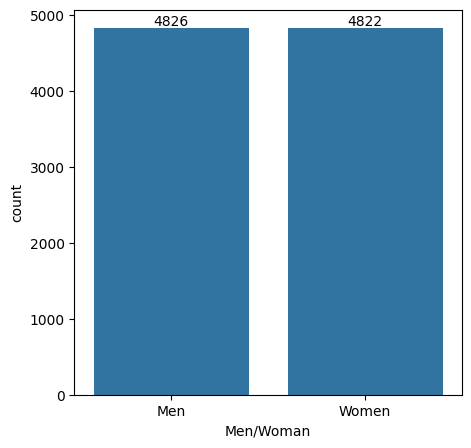

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
ax=sns.countplot(data= df,x="Men/Woman")
ax.bar_label(ax.containers[0])
plt.show()

In [23]:
df_clean['Product'].value_counts().idxmax()
# The most listed product is 'men's athletic footwear'

"men's street footwear"

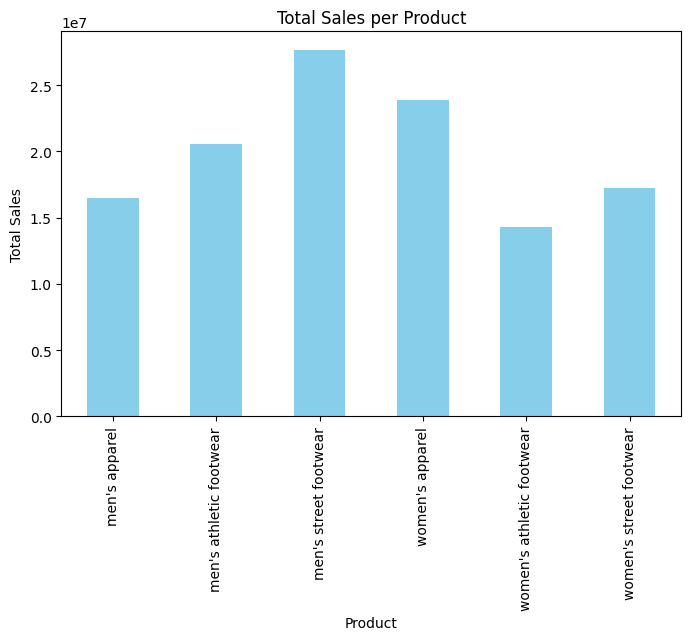

In [26]:
product_sales = df_clean.groupby('Product')['Total_Sales'].sum()

plt.figure(figsize=(8, 5))
product_sales.plot(kind='bar', color='skyblue')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Total Sales per Product')
plt.show()
# Men's Street Footwear' has the highest total sales

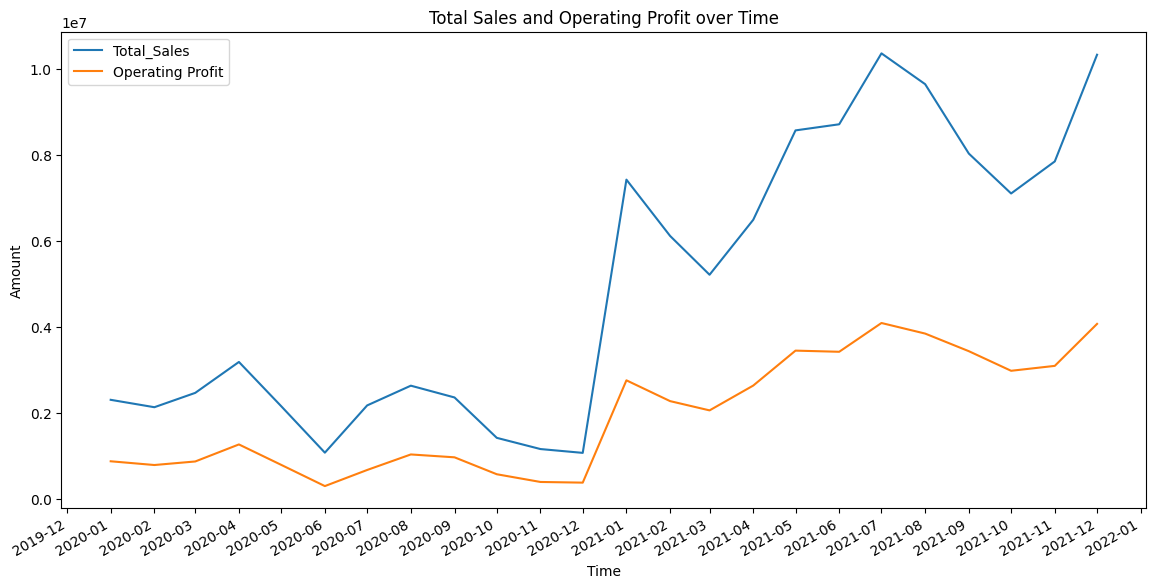

In [31]:
import matplotlib.dates as mdates

df_clean['Year'] = df_clean['Invoice Date'].dt.year
df_clean['Month'] = df_clean['Invoice Date'].dt.month
monthly_data = df_clean.groupby(['Year', 'Month']).agg({
    'Total_Sales': 'sum',
    'Operating Profit': 'sum'
}).reset_index()
monthly_data['Date'] = pd.to_datetime(monthly_data[['Year', 'Month']].assign(day=1))

plt.figure(figsize=(14, 7))

plt.plot(monthly_data['Date'], monthly_data['Total_Sales'], label='Total_Sales')
plt.plot(monthly_data['Date'], monthly_data['Operating Profit'], label='Operating Profit')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate() # for the x date angle

plt.title("Total Sales and Operating Profit over Time")
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend()

plt.show()
#The below graph shows trend of total sales and operating profit over time
#There is a gradual increase in total sales and operating profit over time.
#During dec 2020 to jan 2021, there is a sudden increase in total sales and operating profit but the point to note is that the extent of increase of profit is lesser than that of sales.

In [42]:
top_products = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Products by Total Sales:")
print(top_products)


Top 5 Products by Total Sales:
Product
Men's Street Footwear      27680769.0
Women's Apparel            23870985.0
Men's Athletic Footwear    20577180.0
Women's Street Footwear    17201563.0
Men's Apparel              16520632.0
Name: Total Sales, dtype: float64



Top 5 Products by Total Sales:
Product
Men's Street Footwear      27680769.0
Women's Apparel            23870985.0
Men's Athletic Footwear    20577180.0
Women's Street Footwear    17201563.0
Men's Apparel              16520632.0
Name: Total Sales, dtype: float64


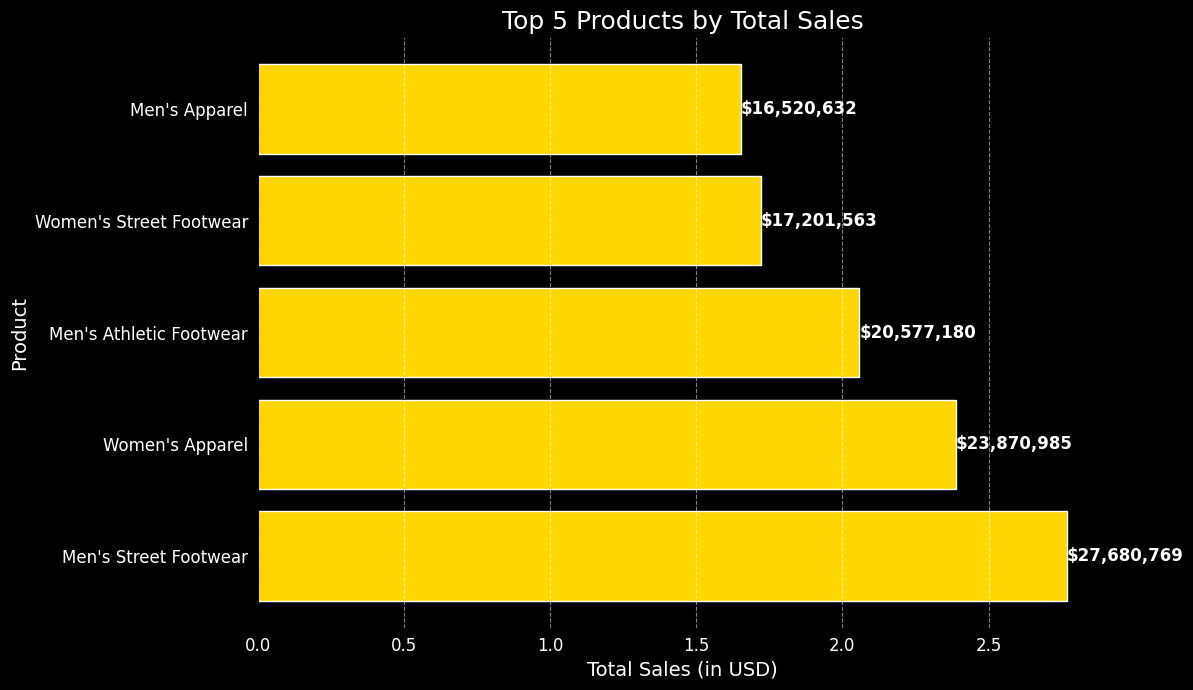

In [43]:
top_products = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False).head(5)
# Print Top 5 Products by Total Sales
print("\nTop 5 Products by Total Sales:")
print(top_products)
# Plotting the graph
plt.figure(figsize=(12, 7), facecolor='black')  # Set black background for the figure
ax = plt.gca()
ax.set_facecolor('black')  # Set black background for the axes

# Create horizontal bar chart
bars = plt.barh(top_products.index, top_products.values, color='gold', edgecolor='white')

# Add labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(
        width, bar.get_y() + bar.get_height() / 2, f"${width:,.0f}",
        ha='left', va='center', fontsize=12, color='white', fontweight='bold'
    )

# Add titles and labels
plt.title('Top 5 Products by Total Sales', fontsize=18, color='white')
plt.xlabel('Total Sales (in USD)', fontsize=14, color='white')
plt.ylabel('Product', fontsize=14, color='white')

# Customize the ticks
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

# Add a grid
plt.grid(axis='x', linestyle='--', alpha=0.5, color='white')

# Adjust layout
plt.tight_layout()

# Show the graph
plt.show()



Sales Over Time:
    Invoice Date  Total Sales
0     2020-01-01     119516.0
1     2020-01-02      97660.0
2     2020-01-03      90323.0
3     2020-01-04      88580.0
4     2020-01-05     100329.0
..           ...          ...
719   2021-12-27      80353.0
720   2021-12-28      40010.0
721   2021-12-29      28859.0
722   2021-12-30      22778.0
723   2021-12-31      26534.0

[724 rows x 2 columns]


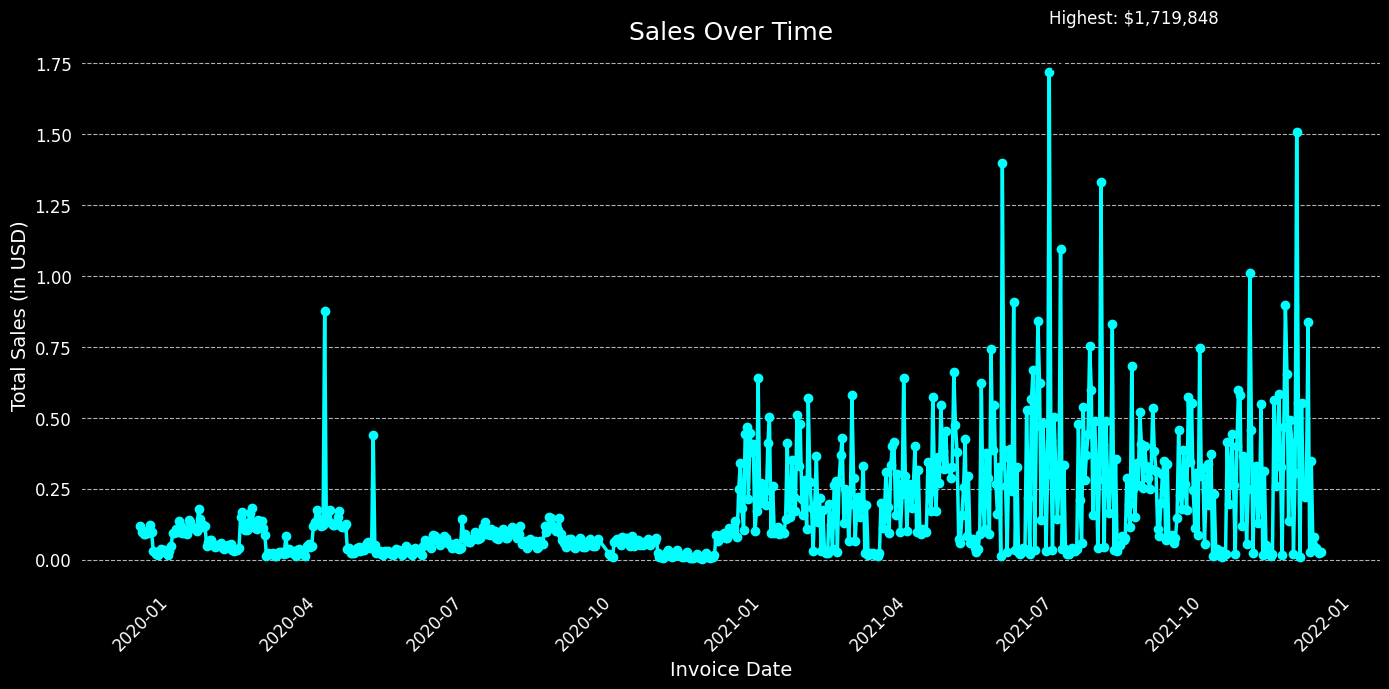

In [46]:
df['Total Sales'] = df['Total Sales'].replace('[\$,]', '', regex=True).astype(float)

# Convert 'Invoice Date' to datetime for proper sorting and plotting
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

# Group data by Invoice Date and sum up Total Sales
sales_over_time = df.groupby('Invoice Date')['Total Sales'].sum().reset_index()

# Print Sales Over Time DataFrame
print("\nSales Over Time:")
print(sales_over_time)

# Plotting the graph
plt.figure(figsize=(14, 7), facecolor='black')  # Set black background for the figure
ax = plt.gca()
ax.set_facecolor('black')  # Set black background for the axes

# Create line plot
plt.plot(sales_over_time['Invoice Date'], sales_over_time['Total Sales'], color='cyan', linewidth=2.5, marker='o')

# Add titles and labels
plt.title('Sales Over Time', fontsize=18, color='white')
plt.xlabel('Invoice Date', fontsize=14, color='white')
plt.ylabel('Total Sales (in USD)', fontsize=14, color='white')

# Customize the ticks
plt.xticks(fontsize=12, color='white', rotation=45)  # Rotate for better readability
plt.yticks(fontsize=12, color='white')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7, color='white')

# Add annotations for max sales
max_sales_date = sales_over_time.loc[sales_over_time['Total Sales'].idxmax(), 'Invoice Date']
max_sales_value = sales_over_time['Total Sales'].max()
plt.annotate(
    f"Highest: ${max_sales_value:,.0f}",
    xy=(max_sales_date, max_sales_value),
    xytext=(max_sales_date, max_sales_value * 1.1),
    arrowprops=dict(facecolor='white', arrowstyle='->'),
    fontsize=12, color='white'
)

# Adjust layout
plt.tight_layout()

# Show the graph
plt.show()


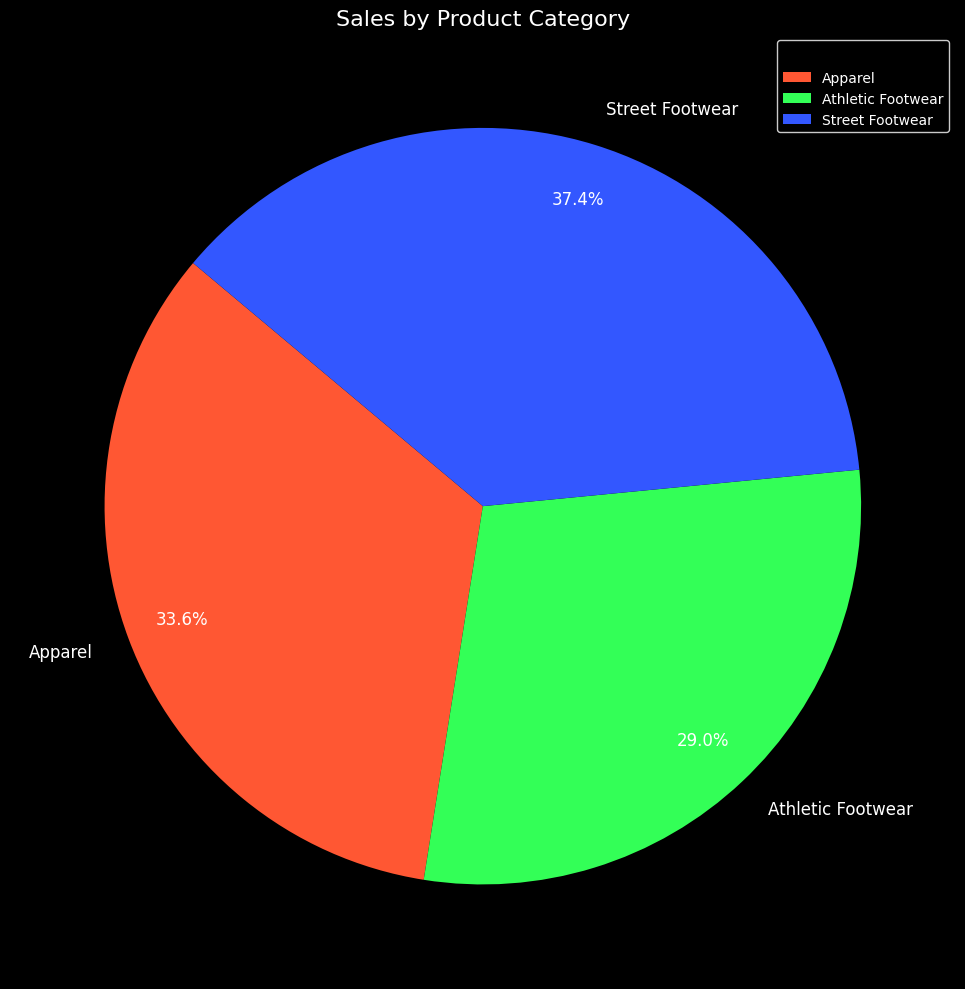

In [51]:

# Group data by 'Product category' and sum 'Total Sales'
product_sales = df.groupby('Product category')['Total Sales'].sum()

# Plotting the pie chart
plt.figure(figsize=(10, 10), facecolor='black')  # Set black background for the figure
ax = plt.gca()
ax.set_facecolor('black')  # Set black background for the axes

# Colors for the pie chart
colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#FFC300', '#33FFF1']

# Create pie chart
product_sales.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=colors,
    textprops={'color': 'white', 'fontsize': 12},
    startangle=140,  # Rotate the start of the pie chart for better visual balance
    legend=True,
    pctdistance=0.85  # Position the percentage labels closer to the center
)

# Add title with white color
plt.title('Sales by Product Category', fontsize=16, color='white')

# Remove default y-axis label for better visuals
plt.ylabel('')

# Add a legend with a black background
plt.legend(title='Product Categories', fontsize=10, loc='best', title_fontsize=12, frameon=True, facecolor='black', edgecolor='white', labelcolor='white')

# Show the plot
plt.tight_layout()
plt.show()


In [50]:
# Example 4: Operating profit margin by product
profit_margin = df.groupby('Product')[['Operating Profit', 'Total Sales']].sum()
profit_margin['Operating Margin (%)'] = (profit_margin['Operating Profit'] / profit_margin['Total Sales']) * 100
print("\nOperating Margin by Product:")
print(profit_margin.sort_values(by='Operating Margin (%)', ascending=False))


Operating Margin by Product:
                           Operating Profit  Total Sales  Operating Margin (%)
Product                                                                       
Men's Street Footwear           11629045.62   27680769.0             42.011281
Women's Apparel                  9685220.56   23870985.0             40.573192
Women's Athletic Footwear        5597822.44   14315521.0             39.103169
Men's Apparel                    6381405.33   16520632.0             38.626884
Women's Street Footwear          6494016.81   17201563.0             37.752481
Men's Athletic Footwear          7437456.94   20577180.0             36.144199


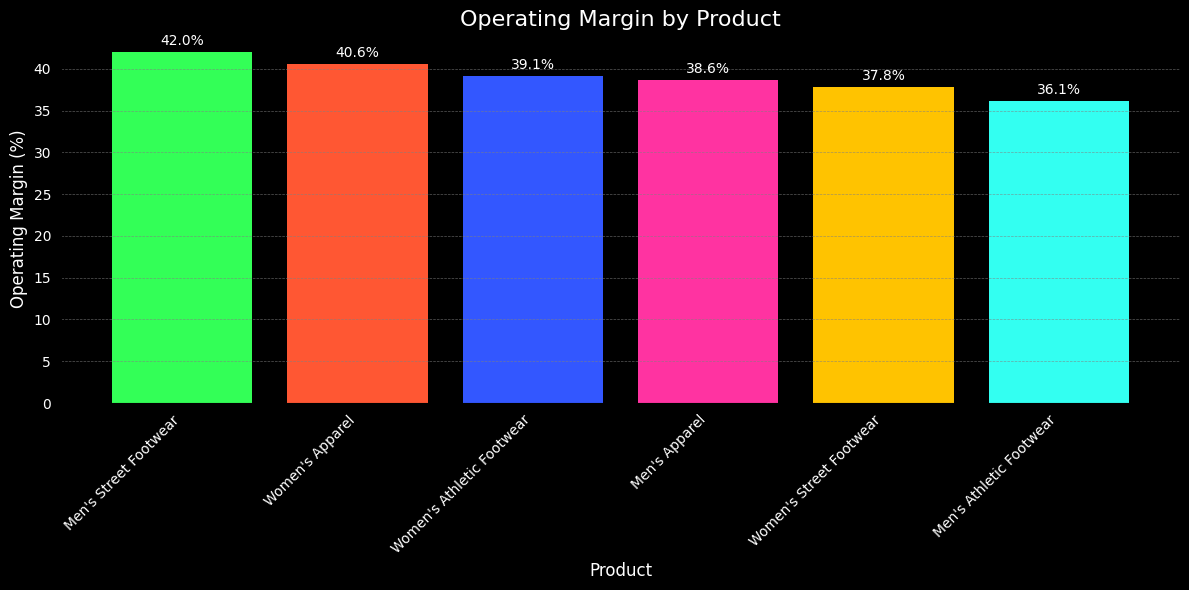

In [53]:

df['Operating Profit'] = df['Operating Profit'].replace('[\$,]', '', regex=True).astype(float)
df['Total Sales'] = df['Total Sales'].replace('[\$,]', '', regex=True).astype(float)

# Group by 'Product' and calculate Operating Margin (%)
profit_margin = df.groupby('Product')[['Operating Profit', 'Total Sales']].sum()
profit_margin['Operating Margin (%)'] = (profit_margin['Operating Profit'] / profit_margin['Total Sales']) * 100

# Sort by Operating Margin (%)
profit_margin = profit_margin.sort_values(by='Operating Margin (%)', ascending=False)

# Plot the bar graph
plt.figure(figsize=(12, 6), facecolor='black')  # Black background
ax = plt.gca()
ax.set_facecolor('black')  # Black axes background

# Bar chart with custom colors
colors = ['#33FF57', '#FF5733', '#3357FF', '#FF33A1', '#FFC300', '#33FFF1'] * (len(profit_margin) // 6 + 1)
bars = plt.bar(
    profit_margin.index,
    profit_margin['Operating Margin (%)'],
    color=colors[:len(profit_margin)]
)

# Add labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of the bar)
        height + 0.5,  # Y position (slightly above the bar)
        f'{height:.1f}%',  # Text label
        ha='center',
        va='bottom',
        color='white',
        fontsize=10
    )

# Title and labels
plt.title('Operating Margin by Product', fontsize=16, color='white')
plt.xlabel('Product', fontsize=12, color='white')
plt.ylabel('Operating Margin (%)', fontsize=12, color='white')
plt.xticks(rotation=45, ha='right', fontsize=10, color='white')  # Rotate x-axis labels
plt.yticks(color='white')

# Add grid for readability
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7, color='gray')

# Show the graph
plt.tight_layout()
plt.show()


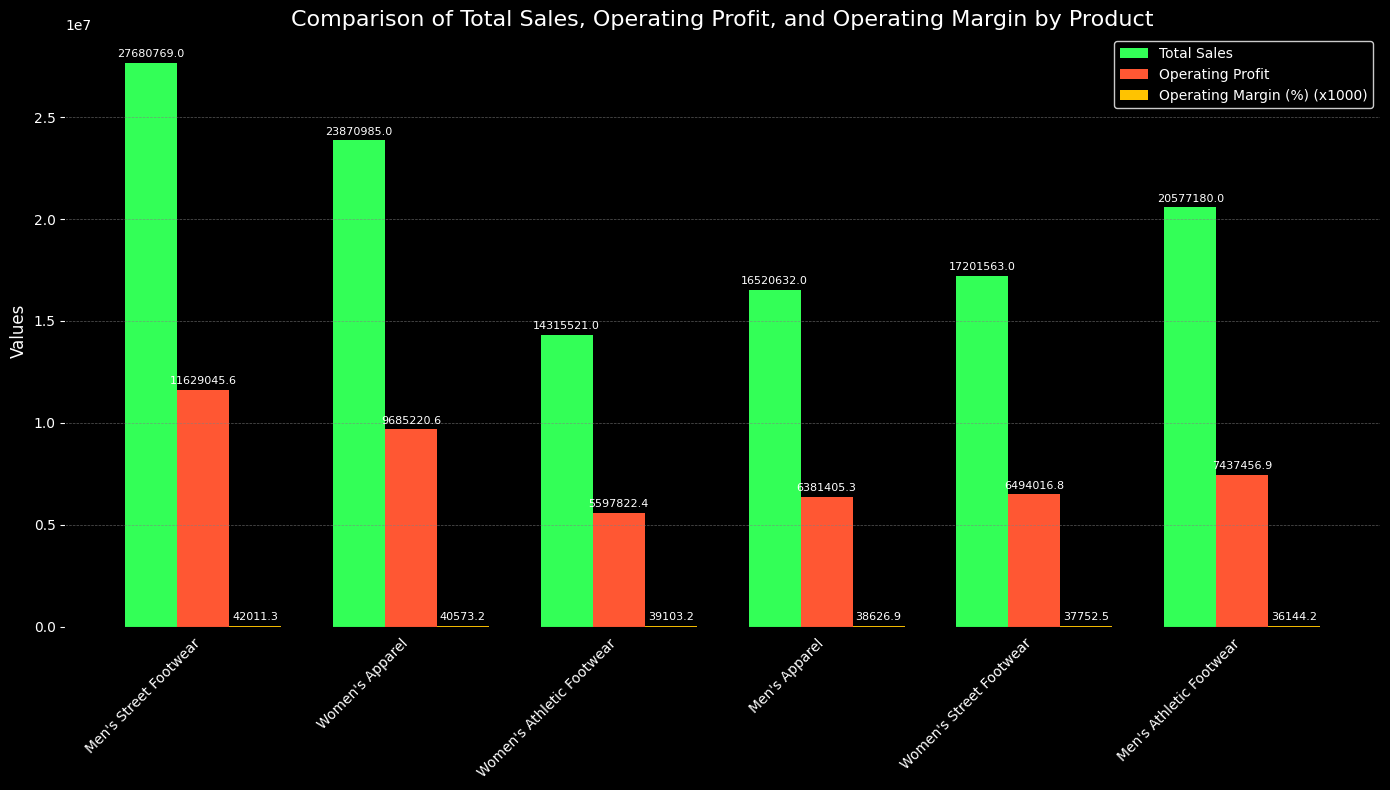

In [58]:

# Ensure numeric conversion for necessary columns
df['Operating Profit'] = df['Operating Profit'].replace('[\$,]', '', regex=True).astype(float)
df['Total Sales'] = df['Total Sales'].replace('[\$,]', '', regex=True).astype(float)

# Group by 'Product' and calculate Total Sales, Operating Profit, and Operating Margin (%)
profit_margin = df.groupby('Product')[['Operating Profit', 'Total Sales']].sum()
profit_margin['Operating Margin (%)'] = (profit_margin['Operating Profit'] / profit_margin['Total Sales']) * 100

# Sort by Operating Margin (%) for better visualization
profit_margin = profit_margin.sort_values(by='Operating Margin (%)', ascending=False)

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(14, 8), facecolor='black')  # Black background
ax.set_facecolor('black')

# Bar width and x-axis positions
bar_width = 0.25
x = range(len(profit_margin))

# Colors for bars
colors = ['#33FF57', '#FF5733', '#FFC300']

# Plot Total Sales, Operating Profit, and Operating Margin (% scaled up) as bars
bars1 = ax.bar(
    [p - bar_width for p in x], 
    profit_margin['Total Sales'], 
    width=bar_width, 
    label='Total Sales', 
    color=colors[0]
)
bars2 = ax.bar(
    x, 
    profit_margin['Operating Profit'], 
    width=bar_width, 
    label='Operating Profit', 
    color=colors[1]
)
bars3 = ax.bar(
    [p + bar_width for p in x], 
    profit_margin['Operating Margin (%)'] * 1000,  # Scale up margin for better visibility
    width=bar_width, 
    label='Operating Margin (%) (x1000)', 
    color=colors[2]
)

# Add labels, title, and legend
plt.xticks(
    x, 
    profit_margin.index, 
    rotation=45, 
    ha='right', 
    fontsize=10, 
    color='white'
)
ax.set_ylabel('Values', fontsize=12, color='white')
ax.set_title('Comparison of Total Sales, Operating Profit, and Operating Margin by Product', fontsize=16, color='white')
ax.tick_params(axis='y', colors='white')

# Legend
ax.legend(fontsize=10, facecolor='black', edgecolor='white', labelcolor='white')

# Grid for readability
ax.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7, color='gray')

# Annotate bars with values
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            height + (max(profit_margin['Total Sales']) * 0.01),  # Adjust position
            f'{height:.1f}', 
            ha='center', 
            fontsize=8, 
            color='white'
        )

# Show the plot
plt.tight_layout()
plt.show()


In [59]:


# Ensure numeric conversion for necessary columns
df['Operating Profit'] = df['Operating Profit'].replace('[\$,]', '', regex=True).astype(float)
df['Total Sales'] = df['Total Sales'].replace('[\$,]', '', regex=True).astype(float)

# Calculate Operating Margin (%) for each product
profit_margin = df.groupby('Product')[['Operating Profit', 'Total Sales']].sum()
profit_margin['Operating Margin (%)'] = (profit_margin['Operating Profit'] / profit_margin['Total Sales']) * 100

# Find the product with the highest operating margin
highest_margin = profit_margin.sort_values(by='Operating Margin (%)', ascending=False).iloc[0]

# Print the result
print("\nProduct with the Highest Operating Margin:")
print(highest_margin)
print(f"\nProduct Name: {profit_margin.sort_values(by='Operating Margin (%)', ascending=False).index[0]}")



Product with the Highest Operating Margin:
Operating Profit        1.162905e+07
Total Sales             2.768077e+07
Operating Margin (%)    4.201128e+01
Name: Men's Street Footwear, dtype: float64

Product Name: Men's Street Footwear


In [7]:
# Display all unique sales channels
sales_channels = df ['Sales Method'].unique()

# Print the sales channels
print("Sales Channels:", sales_channels)




Sales Channels: ['In-store' 'Outlet' 'Online']


In [21]:

channel_counts = df['Sales Method'].value_counts()
print(channel_counts)

Sales Method
Online      4889
Outlet      3019
In-store    1740
Name: count, dtype: int64


In [33]:
print("Total sales: ", df_clean.groupby(['Sales Method']).Total_Sales.sum())
print("Total profit: ", df_clean.groupby(['Sales Method']).Operating_Profit.sum())
# Out of different sales methods, 'online' has the highest total sales and profit whereas, 'in-store' has the lowest total sales and profit.

Total sales:  Sales Method
in-store    35664375.0
online      44965657.0
outlet      39536618.0
Name: Total_Sales, dtype: float64
Total profit:  Sales Method
in-store    127591.2875
online      195525.3772
outlet      149133.0123
Name: Operating_Profit, dtype: float64


In [42]:
df_clean.groupby(['Product'])['Units_Sold'].mean()
#The below lists the average number of units sold per product per day. That is, the average transaction per day.
# men's street footwear has the highest transaction per day whereas, men's apparel has the least.

Product
men's apparel                190.960772
men's athletic footwear      270.513043
men's street footwear        368.521739
women's apparel              269.792910
women's athletic footwear    197.531756
women's street footwear      243.948383
Name: Units_Sold, dtype: float64

In [44]:
df_clean.groupby(['Sales Method'])['Units Sold'].std()
#The belows lists the amount of units sold variation for each sales method
#It is clear that 'outlet' has the highest variation which means that the number of units sold every day differs a lot, while 'online' has the lowest variation

Sales Method
in-store    203.410458
online      176.269773
outlet      232.193750
Name: Units Sold, dtype: float64

In [45]:
df_clean.groupby(['Product'])['Total_Sales'].std()
#These values represent the spread or variability of 'Total_Sales' within each product category.
# A higher standard deviation indicates greater variability in sales within that product category.

Product
men's apparel                10783.845485
men's athletic footwear      12707.987489
men's street footwear        14978.931461
women's apparel              14199.454793
women's athletic footwear     9630.473858
women's street footwear      11196.643353
Name: Total_Sales, dtype: float64

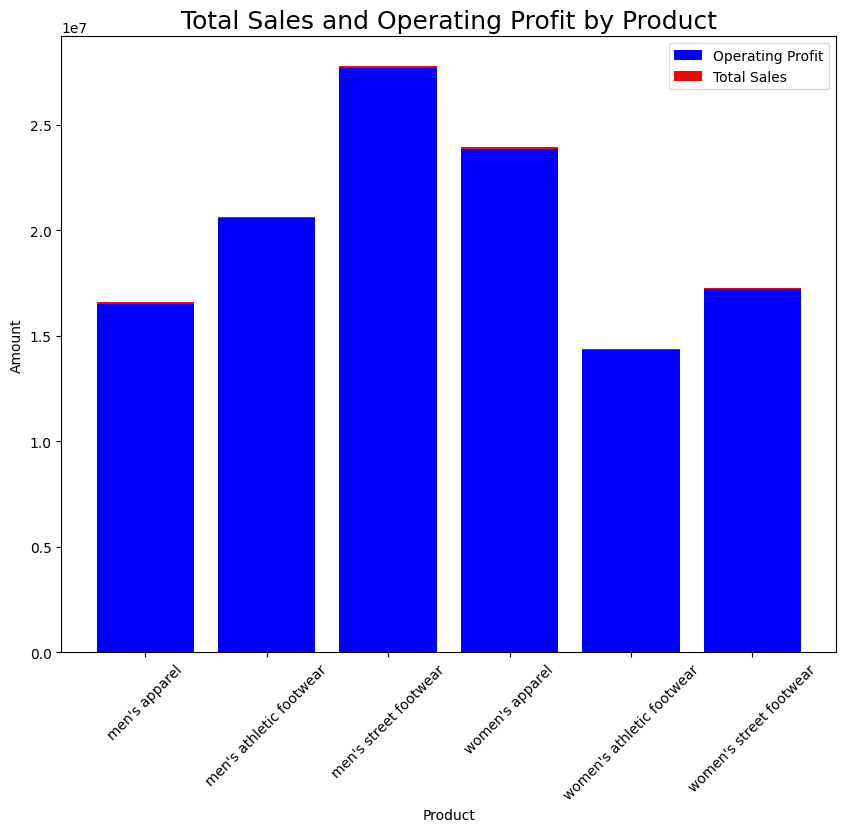

In [46]:
product_sales_profit = df_clean.groupby('Product')[['Total_Sales', 'Operating_Profit']].sum()

plt.figure(figsize=[10,8])
plt.bar(product_sales_profit.index, product_sales_profit['Total_Sales'], color='blue')
plt.bar(product_sales_profit.index, product_sales_profit['Operating_Profit'], bottom=product_sales_profit['Total_Sales'], color='red')

plt.title("Total Sales and Operating Profit by Product", fontsize=18)
plt.xlabel("Product")
plt.ylabel("Amount")
plt.legend(["Operating Profit", "Total Sales"])
plt.xticks(rotation=45)
plt.show()
#This visualization shows operating profit and total salesby product. 
#It is clear that men's street footwear has the highest total sales and operating profit.

# Profitability Analysis

In [47]:
df_clean.groupby(['Product'])['Operating_Profit'].median()
#Considering median, there is more profit in men's street footwear and least in women's athletic footwear.

Product
men's apparel                26.79415
men's athletic footwear      32.93760
men's street footwear        52.01500
women's apparel              40.04200
women's athletic footwear    23.57100
women's street footwear      27.03000
Name: Operating_Profit, dtype: float64

In [48]:
df_clean.groupby(['Product'])['Operating_Margin'].median()
#men's street footwear has the highest operating margin . And the general operating margin is 40%.

Product
men's apparel                0.40
men's athletic footwear      0.40
men's street footwear        0.45
women's apparel              0.44
women's athletic footwear    0.41
women's street footwear      0.40
Name: Operating_Margin, dtype: float64

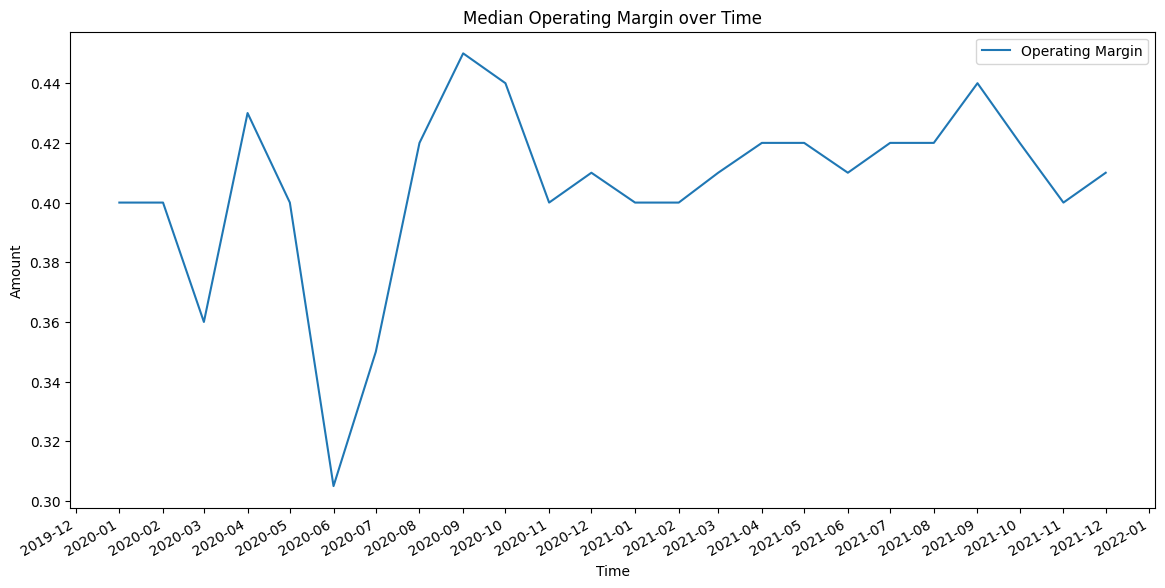

In [50]:
import matplotlib.dates as mdates

df_clean['Year'] = df_clean['Invoice Date'].dt.year
df_clean['Month'] = df_clean['Invoice Date'].dt.month
monthly_data = df_clean.groupby(['Year', 'Month']).agg({
    'Operating_Margin': 'median'
}).reset_index()
monthly_data['Date'] = pd.to_datetime(monthly_data[['Year', 'Month']].assign(day=1))

plt.figure(figsize=(14, 7))
plt.plot(monthly_data['Date'], monthly_data['Operating_Margin'], label='Operating Margin')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate() # for the x date angle

plt.title("Median Operating Margin over Time")
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend()

plt.show()
#The below graph shows trend of median operating margin over time.
#It is clear that the median operating margin is constantly changing over time and was the least in june 2020.
#The highest median operating margin was in sept 2020

In [90]:
# Filter the dataframe for June 2020 and sales method as online
filtered_data = df_clean[(df_clean['Year'] == 2020) & (df_clean['Month'] == 6) & (df_clean['Sales Method'] == 'online')]

# Calculate total sales
total_sales = filtered_data['Total Sales'].sum()
total_sales
print('total_sales =',total_sales)
#The total sales that happened via online in June 2020 is 223,569 units.

total_sales = 223569.0


In [89]:
filtered_data = df_clean[(df_clean['Year'] == 2020) & (df_clean['Month'] == 9) & (df_clean['Sales Method'] == 'online')]

total_sales = filtered_data['Total Sales'].sum()
# Calculate total sales
print('total_sales =',total_sales)

total_sales = 456214.0


In [22]:


# Select relevant columns for comparison
comparison_columns = ['Sales Method', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin']

# Extract the first three rows (assuming they represent the sales data you want to compare)
sales_data = df[comparison_columns].head(3)

# Display the comparison
print("Comparison of First Three Sales Data:")
print(sales_data)

# If you want to add a summary comparison:
print("\nSummary Metrics:")
print("Total Units Sold:", sales_data['Units Sold'].sum())
print("Total Sales:", sales_data['Total Sales'].sum())
print("Average Operating Margin:", sales_data['Operating Margin'].mean())


Comparison of First Three Sales Data:
  Sales Method  Units Sold  Total Sales  Operating Profit  Operating Margin
0     In-store        1200      60000.0          30000.00              0.50
1       Outlet         275      20625.0           6187.50              0.30
2       Online         336      15792.0           9633.12              0.61

Summary Metrics:
Total Units Sold: 1811
Total Sales: 96417.0
Average Operating Margin: 0.47000000000000003


In [55]:
df['year'] = df['Invoice Date'].dt.year
print(df.columns)


Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method', 'Men/Woman',
       'Product category', 'year'],
      dtype='object')


In [56]:
df.groupby('year')['Total Sales'].sum()


year
2020    24237325.0
2021    95929325.0
Name: Total Sales, dtype: float64

# Regional Analysis


Total Sales by Region:
      Region  Total Sales
0    Midwest   16674434.0
1  Northeast   25078267.0
2      South   20603356.0
3  Southeast   21374436.0
4       West   36436157.0


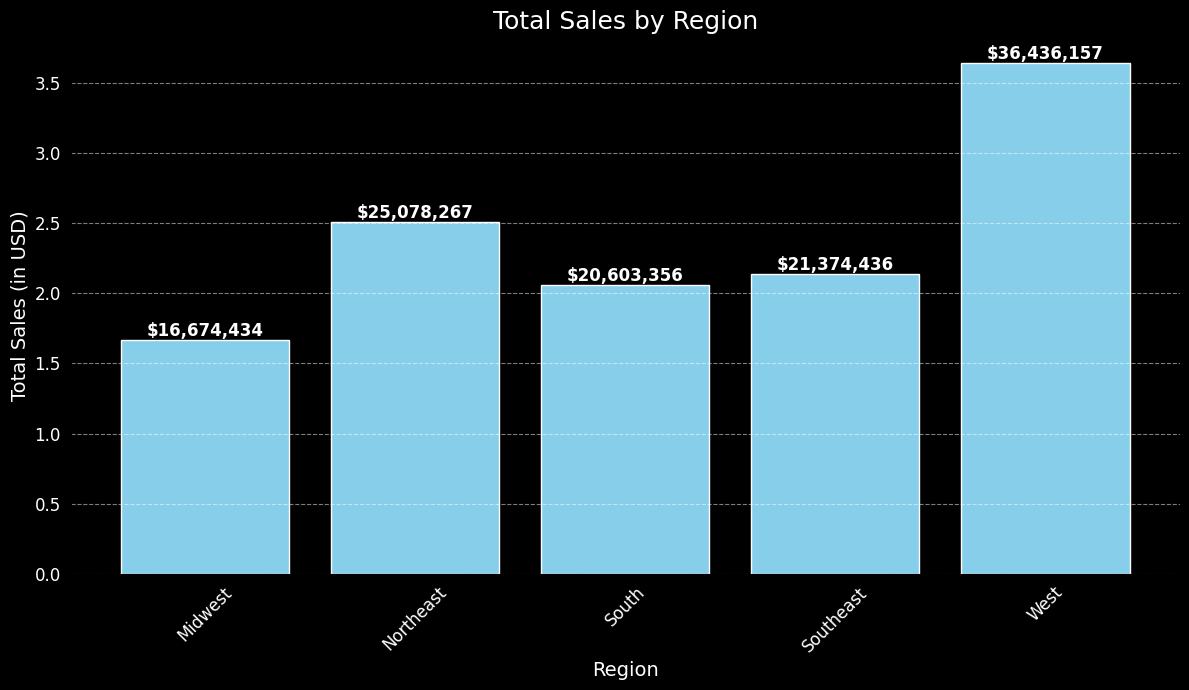

In [41]:
sales_by_region = df.groupby('Region')['Total Sales'].sum().reset_index()
print("\nTotal Sales by Region:")
print(sales_by_region)

# Plotting the graph
plt.figure(figsize=(12, 7), facecolor='black')  # Set black background for the figure
ax = plt.gca()
ax.set_facecolor('black')  # Set black background for the axes

bars = plt.bar(sales_by_region['Region'], sales_by_region['Total Sales'], color='skyblue', edgecolor='white')

# Add labels on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height, f"${height:,.0f}",
        ha='center', va='bottom', fontsize=12, color='white', fontweight='bold'
    )

# Add titles and labels
plt.title('Total Sales by Region', fontsize=18, color='white')
plt.xlabel('Region', fontsize=14, color='white')
plt.ylabel('Total Sales (in USD)', fontsize=14, color='white')

# Customize the x-ticks
plt.xticks(rotation=45, fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

# Add a grid
plt.grid(axis='y', linestyle='--', alpha=0.5, color='white')

# Adjust layout
plt.tight_layout()

# Show the graph
plt.show()


In [58]:
print(df_clean.groupby(['Region'])['Product'].value_counts().idxmax())
print(df_clean.groupby(['State'])['Product'].value_counts().idxmax())
print(df_clean.groupby(['City'])['Product'].value_counts().idxmax())
#The following gives the overall most popular Product in each of region, state and city division.
#men's apparel is the most popular , city and state wise but on a bigger picture, men's athletic footwear is the most popular product in western region.
#Note: Here popularity is taken as the number of times a particular product is listed and not number of products sold.

('west', "men's athletic footwear")
('california', "men's apparel")
('albuquerque', "men's apparel")


In [59]:
print("Region wise: ", df_clean.groupby(['Region', 'Product'])['Units_Sold'].sum().idxmax())
print("State wise: ", df_clean.groupby(['State', 'Product'])['Units_Sold'].sum().idxmax())
print("City wise: ", df_clean.groupby(['City', 'Product'])['Units_Sold'].sum().idxmax())
#specific regional, state, city preferences for certain products are listed below. In each of them, men's street footwear is more preferred.

Region wise:  ('west', "men's street footwear")
State wise:  ('new york', "men's street footwear")
City wise:  ('new york', "men's street footwear")


In [65]:
df_clean.groupby(['Region', 'Sales Method'])['Operating_Profit'].sum()
#This tells us the best sales method for each region for max profit.


Region     Sales Method
midwest    in-store        23165.6500
           online          31332.6398
           outlet          14101.1625
northeast  in-store        42544.2000
           online          22468.3165
           outlet          32315.2225
south      in-store         1348.0000
           online          41498.8822
           outlet          49369.1710
southeast  in-store        25582.5625
           online          50804.0163
           outlet           7544.0132
west       in-store        34950.8750
           online          49421.5224
           outlet          45803.4431
Name: Operating_Profit, dtype: float64

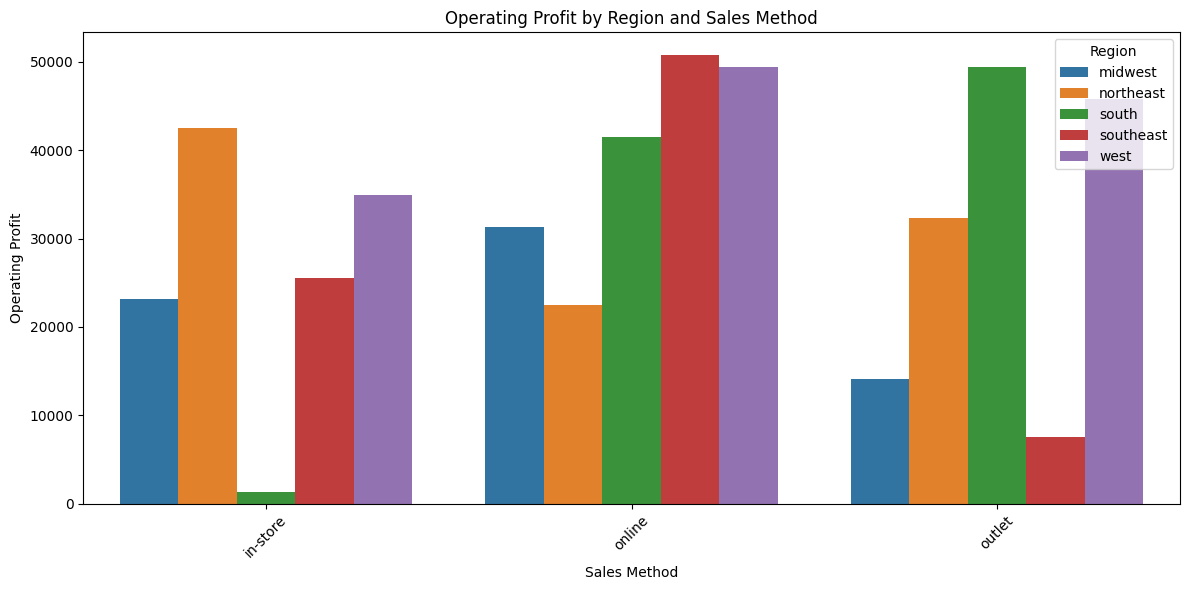

In [63]:
import seaborn as sns

# Grouping and resetting index
grouped_data = df_clean.groupby(['Region', 'Sales Method'])['Operating_Profit'].sum().reset_index()

# Plotting with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='Sales Method', y='Operating_Profit', hue='Region')

# Adding labels and title
plt.xlabel('Sales Method')
plt.ylabel('Operating Profit')
plt.title('Operating Profit by Region and Sales Method')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


# Retailer Analysis

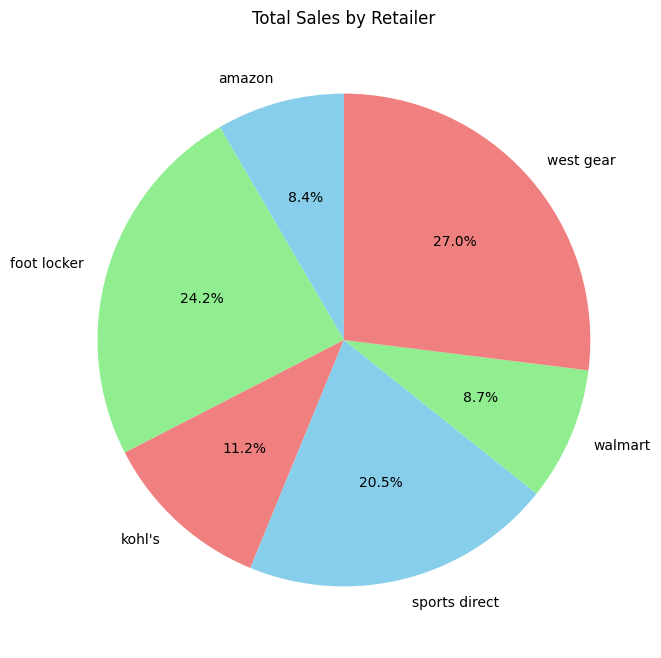

In [62]:
sales_by_location = df_clean.groupby('Retailer')['Total_Sales'].sum()

# Plotting a pie chart for total sales by retailer
plt.figure(figsize=(8, 8))
sales_by_location.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Total Sales by Retailer')
plt.ylabel('')
plt.show()
#The total sales is highest by the retailer - west gear followed by foot locker. 
#Even though online mode has the highest sales, amazon has the least total sales.

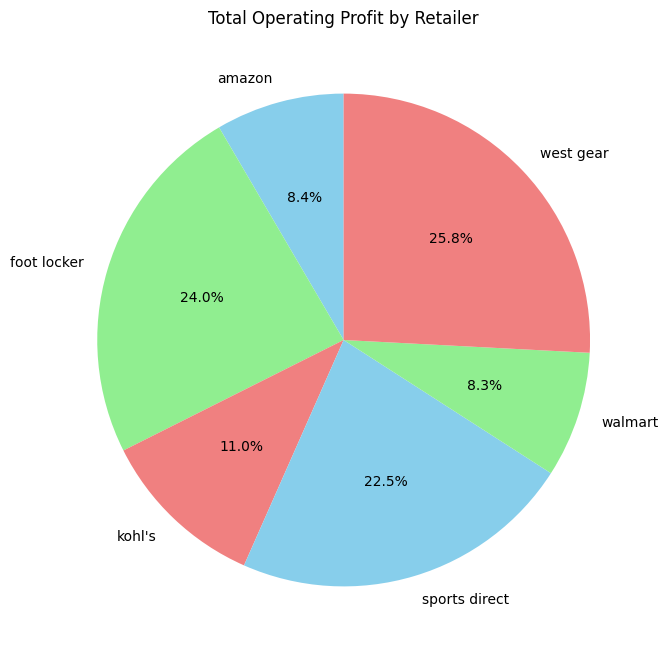

In [66]:
sales_by_location = df_clean.groupby('Retailer')['Operating_Profit'].sum()

# Plotting a pie chart for operating profit by retailer
plt.figure(figsize=(8, 8))
sales_by_location.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Total Operating Profit by Retailer')
plt.ylabel('')
plt.show()
#The operating profit is highest by the retailer - west gear followed by foot locker. 
#Even though online mode has the highest operating profit, amazon has the least operating profit.

In [68]:
df_clean.groupby(['Retailer', 'Sales Method'])['Operating_Profit'].mean()
# The below lists the average operating profit by each retailer.
#Even though west gear had the highest total operating profit, walmart outperformed them in terms of average operational profits.
# Even though online mode had the overall highest operating profit, considering each retailer's sales method, in-store had the highest operating profit.

Retailer       Sales Method
amazon         in-store         70.839725
               online           37.730553
               outlet           38.181218
foot locker    in-store         62.565702
               online           37.173887
               outlet           41.892434
kohl's         in-store         73.590712
               online           38.316382
               outlet           61.791298
sports direct  in-store         70.357125
               online           45.421144
               outlet           54.579854
walmart        in-store        133.253378
               online           47.811027
               outlet           67.533348
west gear      in-store         78.681152
               online           38.593110
               outlet           42.605734
Name: Operating_Profit, dtype: float64

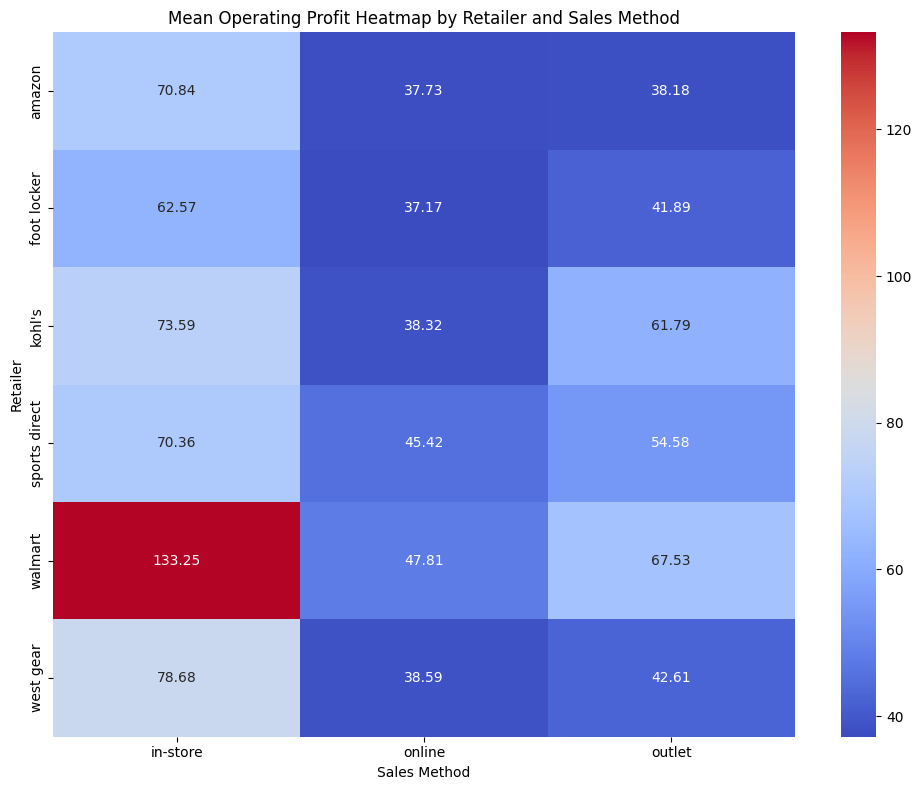

In [69]:
# Pivot the grouped data for heatmap
heatmap_data = df_clean.groupby(['Retailer', 'Sales Method'])['Operating_Profit'].mean().unstack()

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Mean Operating Profit Heatmap by Retailer and Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Retailer')
plt.tight_layout()

plt.show()


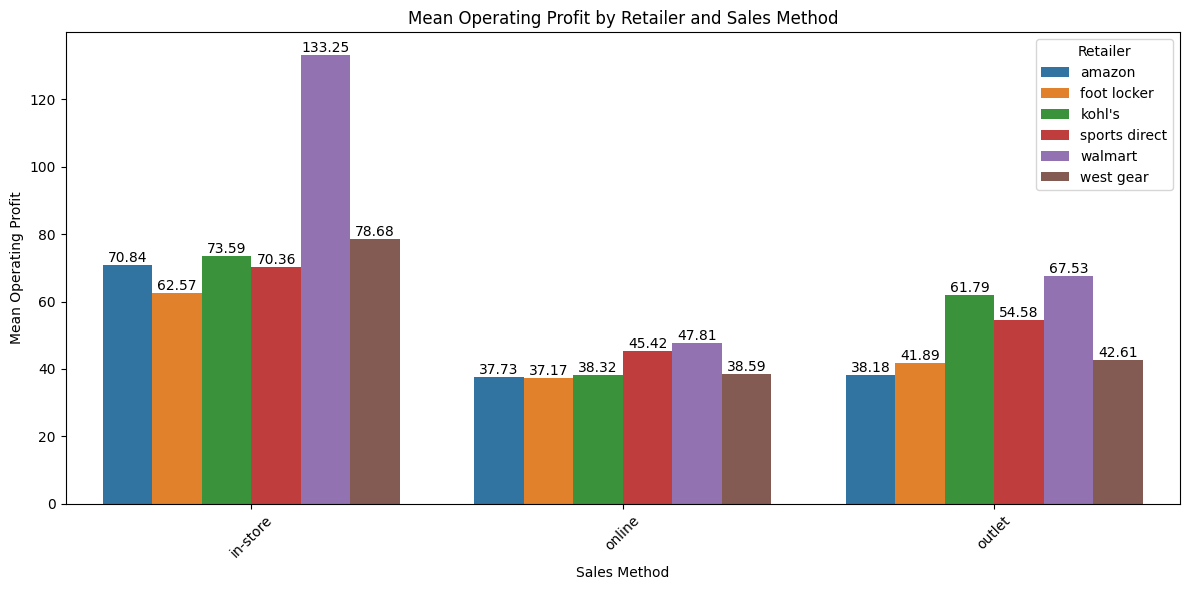

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping and resetting index
grouped_data = df_clean.groupby(['Retailer', 'Sales Method'])['Operating_Profit'].mean().reset_index()

# Plotting with Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grouped_data, x='Sales Method', y='Operating_Profit', hue='Retailer')

# Adding labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')  # '%.2f' for 2 decimal places

# Adding labels and title
plt.xlabel('Sales Method')
plt.ylabel('Mean Operating Profit')
plt.title('Mean Operating Profit by Retailer and Sales Method')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [73]:
df_clean.groupby('Retailer')['Product'].value_counts()
#The below lists the most popular products sold by each retailer. This gives us an idea about how each retailer is making more profits through their products.

Retailer       Product                  
amazon         men's athletic footwear      159
               men's street footwear        159
               women's apparel              159
               women's athletic footwear    158
               men's apparel                157
               women's street footwear      157
foot locker    men's street footwear        449
               men's athletic footwear      442
               women's athletic footwear    442
               women's street footwear      438
               men's apparel                433
               women's apparel              433
kohl's         men's athletic footwear      172
               men's street footwear        172
               women's apparel              172
               women's street footwear      172
               men's apparel                171
               women's athletic footwear    171
sports direct  women's street footwear      342
               women's apparel              341

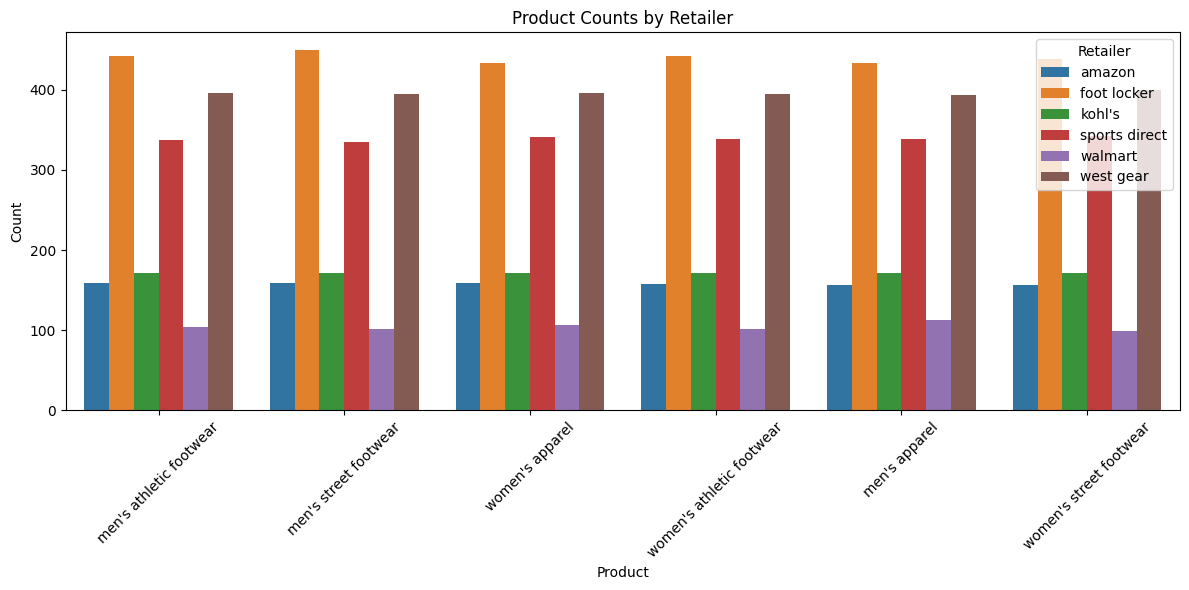

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping and resetting index
result_df = df_clean.groupby('Retailer')['Product'].value_counts().reset_index(name='Count')

# Plotting with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=result_df, x='Product', y='Count', hue='Retailer')

# Adding labels and title
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Product Counts by Retailer')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


# Pricing Analysis

In [74]:
df_clean[['Price_per_Unit','Units_Sold', 'Total_Sales', 'Operating_Profit', 'Operating_Margin']].corr()
# If Price per unit is more, the total sales & operating profit will be more since they are positively correlated.
# Whereas, price per unit and operating margin has negative weak correaltion.
# Price per unit and units sold are positively weakly correlated. This wouldn't guarantee that more price per unit would mean more units sold to some extent.
# units sold and operating profit have positive strong correlation which is by logic correct and same with units sold and total sales.
# Interestingly, operating margin and units sold are negatively moderately correlated.
# As operating margin and unit sold is negatively moderately correlated, so we can say that the most sales/more units would be sold due to excess money spent on ads and hence we could justify that maybe the sales are high but the profit margin is comparitively less.

,Price_per_Unit,Units_Sold,Total_Sales,Operating_Profit,Operating_Margin
Price_per_Unit,1.000000,0.265869,0.539547,0.503683,-0.137486
Units_Sold,0.265869,1.000000,0.919339,0.871993,-0.305479
Total_Sales,0.539547,0.919339,1.000000,0.935372,-0.302295
Operating_Profit,0.503683,0.871993,0.935372,1.000000,-0.047491
Operating_Margin,-0.137486,-0.305479,-0.302295,-0.047491,1.000000


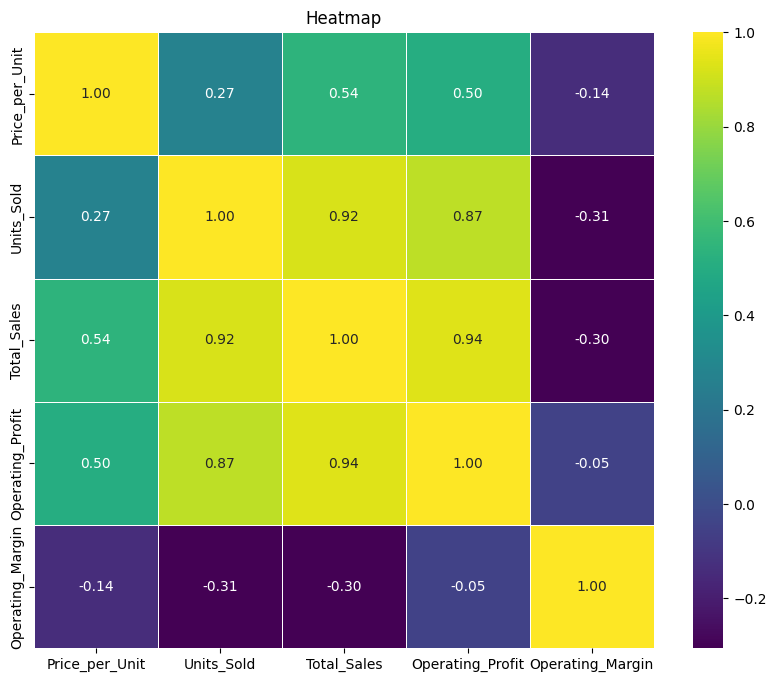

In [75]:
heatmap = df_clean[['Price_per_Unit','Units_Sold', 'Total_Sales', 'Operating_Profit', 'Operating_Margin']]
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap.corr(), cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Heatmap')
plt.show()

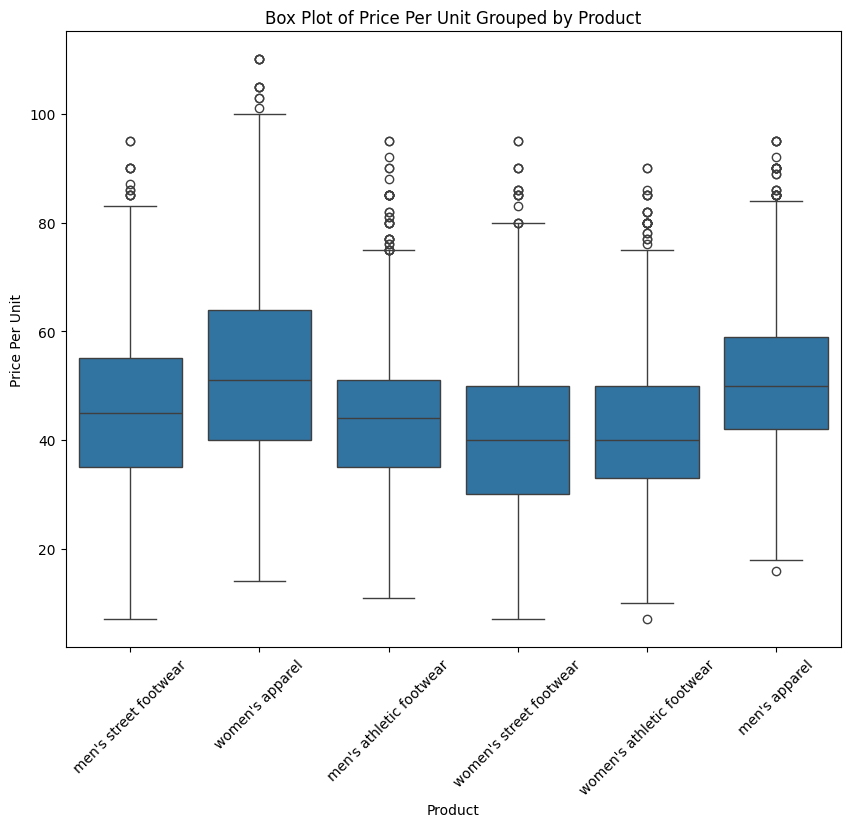

In [76]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Product', y='Price_per_Unit', data=df_clean)
plt.title('Box Plot of Price Per Unit Grouped by Product')
plt.xlabel('Product')
plt.ylabel('Price Per Unit')
plt.xticks(rotation=45)
plt.show()
#Generally, price per unit for each product has normal distribution but for "men's athletic footwear" it is slightly left skewed
# and for "women's athletic footwear" it is slightly right skewed.

#The median price per unit for "men's apparel" and "women's apparel" is the highest.
#"women's street footwear" and "women's athletic footwear" has the lowest median price per unit.
#There are many outliers towards the right side of the graph for each product.

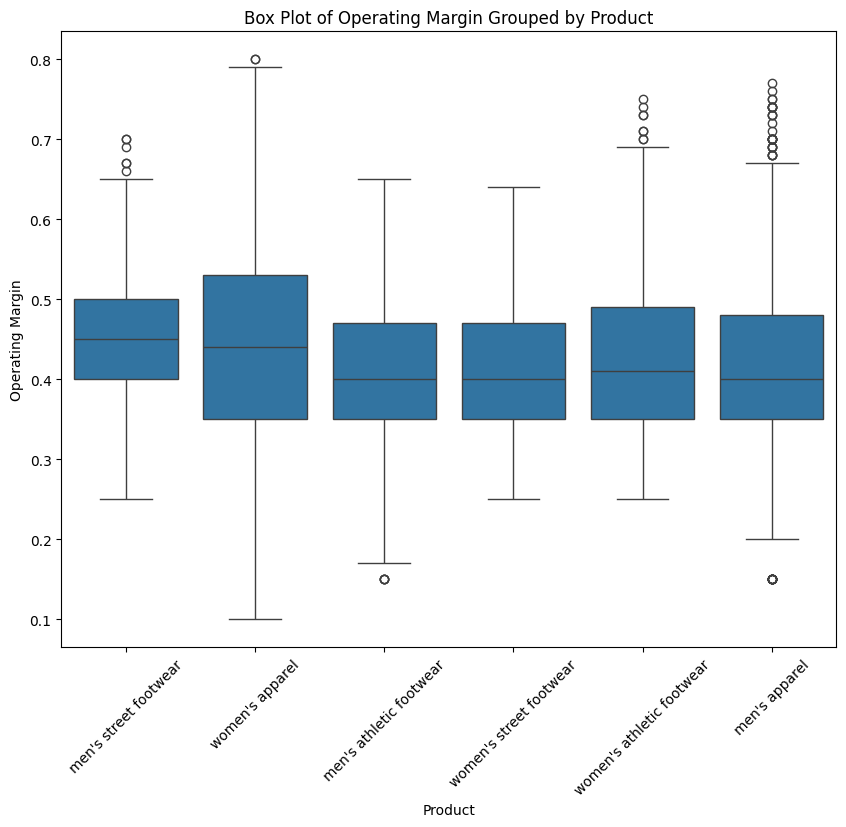

In [77]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Product', y='Operating_Margin', data=df_clean)
plt.title('Box Plot of Operating Margin Grouped by Product')
plt.xlabel('Product')
plt.ylabel('Operating Margin')
plt.xticks(rotation=45)
plt.show()
#In general, the operating margin for each product has slight right skewness, 
# but for "men's street footwear" and "women's apparel" it is normal distributed.

In [83]:
final_table = df_clean.groupby(['Region', 'State', 'City','Sales Method','Product']).Operating_Profit.median()
final_table = final_table.sort_values(ascending=False)
final_table.to_csv('Final_Profit_dataset.csv')
#This creates a new csv file which groups region, state, city, sales method and product based on median operating profits which helps the company make better decisions while investing to gain maximum profits.

# RESULT AND DISCUSSION
### Data Cleaning (Data Preprocessing):
 ##### ● The process of removing symbols and converting data types is well-executed, ensuring consistency.
 ##### ● Thehandling of datetime columns is appropriately carried out.
 ##### ● However, further insights into why these specific cleaning steps were chosen and their potential impact on the analysis would enhance transparency.
### Exploratory Data Analysis (EDA):
 ##### ● The identification of the most listed and highest sales product provides valuableinsights.
 ##### ● The timeline graph effectively captures patterns, but deeper exploration into the factors causing the surge in total sales post-December 2020 would enhance the analysis.
### Sales Analysis:
 ##### ● The identification of the most frequently listed product ('Men’s Athletic Footwear') and the highest total sales product ('Men’s Street Footwear') is insightful.
 ##### ● The timeline graph effectively captures patterns, particularly the surge in total sales post-December 2020.
### Profitability Analysis:
 ##### ● Thefocus on median operating profit and margin is commendable.
 ##### ● The time series plot offers visibility into fluctuations, but a more detailed exploration of the June 2020 decline would provide a richer understanding.
### Regional Analysis:
 ##### ● The recognition of the western region, especially New York, as the leader in overall sales is well-established.
 ##### ● The popularity of 'Men's Athletic Footwear' in the western region is an interesting observation.
### Retailer Analysis:
 ##### ● Thecalculation of total sales and operating profit by retailer is thorough.
 ##### ● While pie charts visually represent the data, additional insights into why certain retailers outperform others would strengthen the analysis.
### Pricing Analysis:
 ##### ● The correlation matrix and heatmap effectively visualize relationships between variables.
 ##### ● The interpretation of positive correlations aligns logically, but delving deeper into potential causation would add depth.
 ##### ● The box plots offer valuable insights into the distribution characteristics of product prices and operating margins.